In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import plotly_express as px

In [2]:
import re
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from plotly.offline import  init_notebook_mode, iplot

In [3]:
books = pd.read_csv("books.csv")
books.head()

bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors average_rating        isbn    isbn13  \
0  J.K. Rowling/Mary GrandPré           4.57   439785960  9.78E+12   
1  J.K. Rowling/Mary GrandPré           4.49   439358078  9.78E+12   
2                J.K. Rowling           4.42   439554896  9.78E+12   
3  J.K. Rowling/Mary GrandPré           4.56  043965548X  9.78E+12   
4  J.K. Rowling/Mary GrandPré           4.78   439682584  9.78E+12   

  language_code   num_pages  ratings_count  text_reviews_count  \
0           eng         652        2095690               27591   
1           eng         870        2153167               29221   
2           eng         352           6333                 244   
3           eng         435        2339585               36325   
4           eng        2690          41428                 164   

  publication_date        publisher  
0        9/16/2006  Scholastic Inc.  
1       09-01-2004  Scholastic Inc.  
2       11-01-2003       Scholastic  
3       05-01-2004  Scholastic Inc.  
4        9/13/2004       Scholastic

In [4]:
books.describe()

bookID  ratings_count  text_reviews_count
count  11127.000000   1.112700e+04        11127.000000
mean   21310.938887   1.793649e+04          541.864474
std    13093.358023   1.124794e+05         2576.174610
min        1.000000   0.000000e+00            0.000000
25%    10287.000000   1.040000e+02            9.000000
50%    20287.000000   7.450000e+02           47.000000
75%    32104.500000   4.993500e+03          237.500000
max    45641.000000   4.597666e+06        94265.000000

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [6]:
books.shape

(11127, 12)

In [7]:
books = books[(books[['average_rating','ratings_count','text_reviews_count']] != '0').all(axis=1)]
books.drop(books.index[books['authors'] == 'NOT A BOOK'], inplace = True)

In [8]:
books.shape

(11097, 12)

In [9]:
top_rated = books.sort_values('average_rating', ascending=False)
fifty_top_rated = top_rated[:30]
fig = px.treemap(fifty_top_rated, path=['title'], values='average_rating',title='Top Rated Books', width=1000, height=700)
fig.show()

In [10]:
top_popular = books.sort_values('ratings_count', ascending=False)
fifty_top_popular = top_popular[:50]
fig = px.treemap(fifty_top_popular, path=['title'], values='ratings_count',title='Popular Books', width=1000, height=700)
fig.show()

In [11]:
fifty_top_authors = top_rated[:50]
fig = px.treemap(fifty_top_authors, path=['authors'], values='average_rating',title='Popular Authors', width=1000, height=700)
fig.show()

In [12]:
top_author_counts = books['authors'].value_counts().reset_index()
top_author_counts.columns = ['value', 'count']
top_author_counts['value'] = top_author_counts['value']
top_author_counts = top_author_counts.sort_values('count')
fig = px.bar(top_author_counts.tail(50), x="count", y="value", title='Top Authors', orientation='h', color='value',
             width=1000, height=700)
fig.show()

In [13]:
cross_author_counts = books['publisher'].value_counts().reset_index()
cross_author_counts.columns = ['value', 'count']
cross_author_counts['value'] = cross_author_counts['value']
cross_author_counts = cross_author_counts.sort_values('count')
fig = px.bar(cross_author_counts.tail(50), x="count", y="value", title='Top Publisher', orientation='h', color='value',
             width=1000, height=700)
fig.show()

In [14]:
stop_words=set(STOPWORDS)
author_text = " ".join(books['authors'])
title_text = " ".join(books['title'])
publisher_text = " ".join(books['publisher'].astype(str))

In [15]:
def wordcloud(string):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21, max_font_size=110,stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(wc)

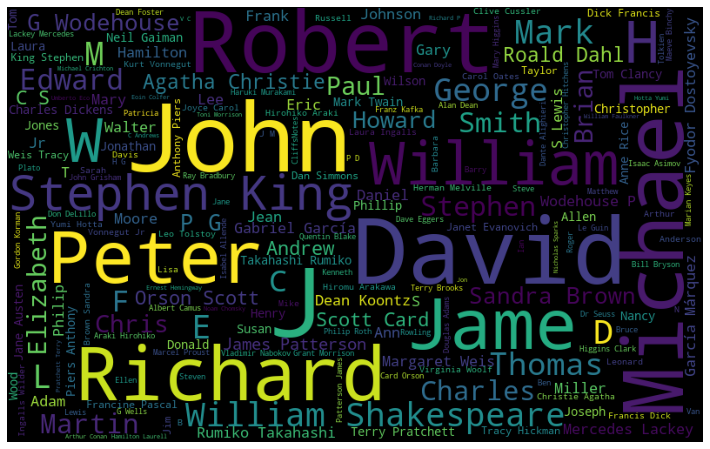

In [16]:
wordcloud(author_text)

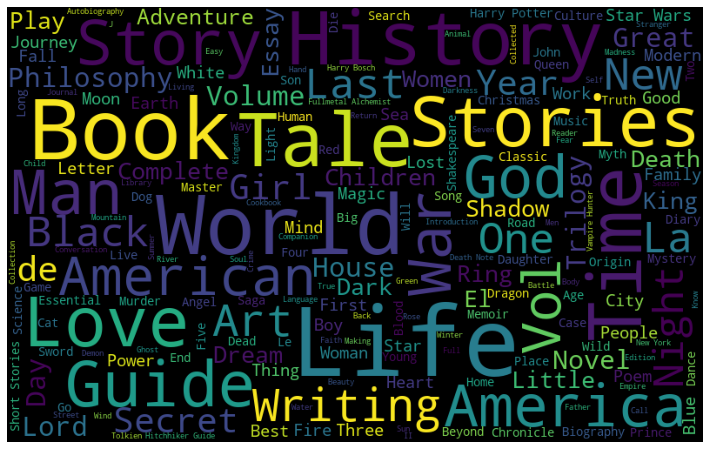

In [17]:
wordcloud(title_text)

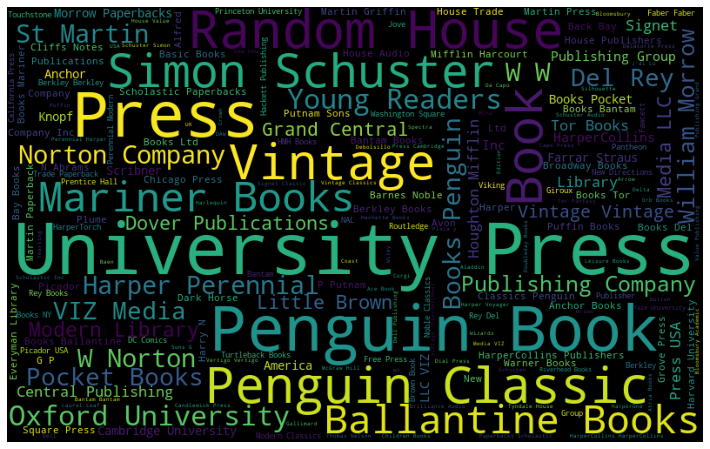

In [18]:
wordcloud(publisher_text)